# **California Housing**
Replication of analysis from The Elements of Statistical Learning, 10.14.

Y
---
```
1. median House Value
```

X
---
```
1. median income
2. housing median age
3. total rooms
4. total bedrooms
5. population
6. households
7. latitude
8. longitude
```

Implementation Details
---
```
Split : 80 20
Learning rate(v) analysis: 0.1
Terminal Nodes(J) : 6
**Loss function : Huber **
```

Expectations
---
```
800 iterations => leveling of AAE to 0.31

In [ ]:
pip install xgboost

[20:11:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2884829159074857


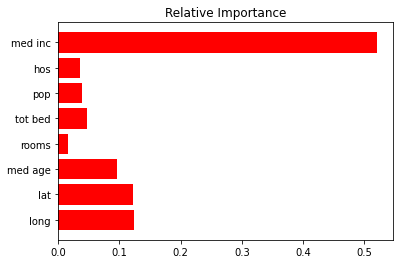

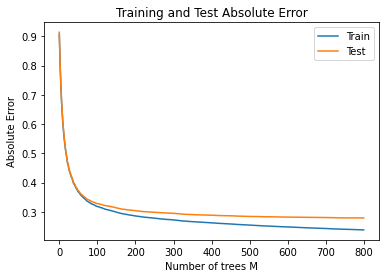

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

labels = ['long','lat','med age','rooms','tot bed','pop','hos','med inc']

# importing
ds = pd.read_csv("housing.csv", "," )
ds = ds.drop(labels="ocean_proximity", axis=1)

# get values
y,x = ds.iloc[:, -1].values, ds.iloc[:,:-1].values
x = scale(x)
y = scale(y)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)

# Set up XGB???
xgb_train = xgb.DMatrix(data=x_train, label=y_train)
xgb_test = xgb.DMatrix(data=x_test, label=y_test)

# Google Colab version of XGboost does not have the evaluation metric of 'mphe' mean Pseudo Huber error, which seems to be what the textbook uses for its results.

param = {
    'eta':0.1,
    'max_leaves':6,
    'eval_metric':'mae'
    }

M = 800
eval_set = [(x_train, y_train), (x_test, y_test)]

model = xgb.XGBRegressor(
    eta=0.1,
    max_leaves=6,
    eval_metric='mae',
    n_estimators=M,
    )

model = model.fit(x_train, y_train, eval_set=eval_set, verbose=False)
preds = (model.predict(x_test))
final_error = mean_absolute_error(preds, y_test)

# Make graph showing improvement with growing N
    # test error
    # training error
results = model.evals_result()

print( final_error )


# feature importance graph
importance = model.feature_importances_
plt.barh( labels, importance, color='r')
plt.title('Relative Importance')
plt.show()


training_err = results['validation_0']['mae']
testing_err = results['validation_1']['mae']
x_axis = range( 0, len(training_err) )



plt.plot(x_axis, training_err, label = 'Train')
plt.plot(x_axis, testing_err, label='Test')
plt.xlabel('Number of trees M')
plt.ylabel('Absolute Error')
plt.title('Training and Test Absolute Error')
plt.legend();
print(final_error)



The plots generated match up with the plots from the textbook analysis. The final test absolute error is slightly different than the one from the textbook due to the different evaluation metric used. XGBoost on colab did not offer a Huber loss function (even though the documentation says it does), so mean absolute error 'mae' was used as the metric instead.

In terms of the feature importance, it makes total sense that the median income is by far the most important trait. Next two highest features are longitude and latitude, which make sense thinking of the wealth disparity geographically. Certain sectors of the state would have large spans of poor neighborhood while the elite and wealthy high power individuals would congregate to some gentrified neighborhood away from the rest. 

One interesting results from the dataset is the correlation with rooms and bedrooms, and it is interesting to see that bedroom has bigger impact on the pricing than the overall room counts, which is expected as if you have high numbers of roooms but its in a ratio of 3bed, 2bath and 1 living, the price should not vary too much compared to 3-1-1.

It makes sense that median age would be important to housing price. A young household makes sense to not correlate to a wealthy house as much as an older household that have developed in their career and have more financial mobility options.


# Forest Fire 


4. Relevant Information:

   This is a very difficult regression task. It can be used to test regression methods. Also,
   it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

5. Number of Instances: 517 

6. Number of Attributes: 12 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb


labels = ['x','y', 'month', 'day', 'FFMC','DMC','DC','ISI','temp','RH','wind', 'rain']

ds = pd.read_csv("forestfires.csv", "," )
ds.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
ds.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
# ds = ds.drop(labels="FFMC", axis=1)
# ds = ds.drop(labels="DMC", axis=1)
# ds = ds.drop(labels="DC", axis=1)
# ds = ds.drop(labels="ISI", axis=1)

# ds = ds.drop(labels="month", axis=1)
# ds = ds.drop(labels="day", axis=1)

y,x = ds.iloc[:, -1].values, ds.iloc[:,:-1].values
# y = [np.log10(entry+1) for entry in y]
# x = np.log10(x+1)

x = scale(x)
y = scale(y)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)

**correlation color map**
---

[Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'month'),
 Text(0, 0, 'day'),
 Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'area')]

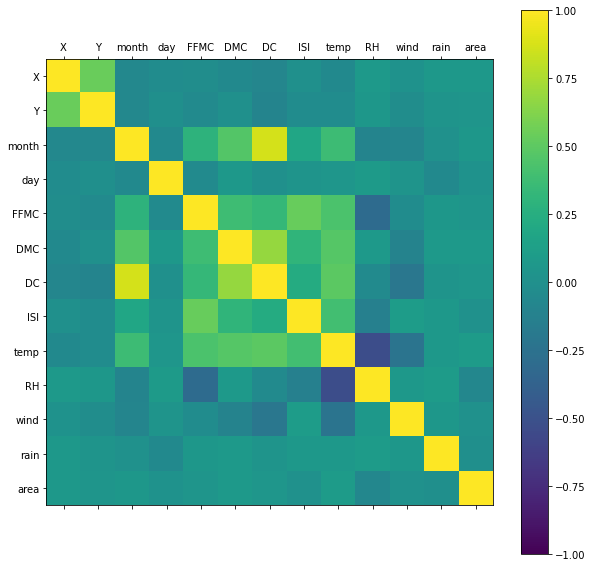

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(ds.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ds.columns)
ax.set_yticklabels(ds.columns)

Here we see trends that we expect :

**Days** do not have much correlation to other features.

**Months** on the other hand, clearly are correlated to some meteorological features.

**Temperature** has high correlation with a lot of meterological features . In fact, many of these features seem to be highly correlated amongst themselves (**FFMC, DMC, DC, ISI**). This is a lot of multi-colinearity... 

**relative importance**
---

12
12


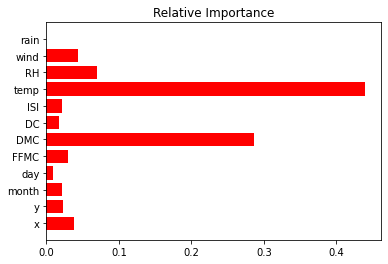

In [ ]:
# feature importance graph
importance = model.feature_importances_
print(len(importance))
print(len(labels))
plt.barh( labels, importance, color='r')
plt.title('Relative Importance')
plt.show()

From the results, we can see that one clear factor is the temperature. This is expected as higher temperatures are known to be correlated to a higher rate of forest fires.


One surprising result that came from our analysis is the rain factor. 
From our knowledge, we assume that that the rain factor will have a huge impact on the result as rain wil be able to extinguish the fire or minimize the spread of wildfire. However, the model shows that it is not the case. Upon further inspection of the dataset, we realize that the vast majority of rain observations were 0. That will heavily skew that data which will lower the weight of the rainfall as theres not enough information to tell the feature is important.


**model prediction**
---

[00:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
predicted: 0.24340320432735266
baseline: 0.21964355905442356


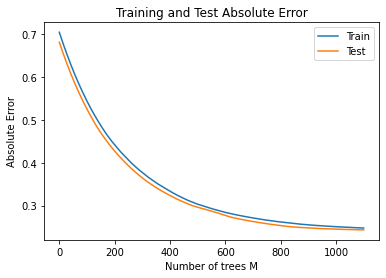

In [ ]:
M = 1100
eval_set = [(x_train, y_train), (x_test, y_test)]

model = xgb.XGBRegressor(
    learning_rate=0.004,
    max_leaves=4,
    max_depth=2,
    eval_metric='mae',
    n_estimators=M
    )

model = model.fit(x_train, y_train, eval_set=eval_set, verbose=False)
preds = (model.predict(x_test))

final_error = mean_absolute_error(preds, y_test)
base_line = mean_absolute_error( np.repeat( np.mean(y_test), len(y_test) ) , y_test )
results = model.evals_result()

print(f'predicted: {final_error}')
print(f'baseline: {base_line}')


training_err = results['validation_0']['mae']
testing_err = results['validation_1']['mae']
x_axis = range( 0, len(training_err) )


# Training and test absolute error
plt.plot(x_axis, training_err, label = 'Train')
plt.plot(x_axis, testing_err, label='Test')
plt.xlabel('Number of trees M')
plt.ylabel('Absolute Error')
plt.title('Training and Test Absolute Error')
plt.legend()

Although our model was tuned so it does not overfit, the model could not pass the baseline guess. We were not able to tune the model so that it had low training error and was not overfitting. 

The label of this dataset is extremely skewed to 0 so the baseline is already relatively low. 

Attempts to do a logarithm transform on the labels did not seem to make the model predictions any better either.

There aren't many points in this dataset, about 500 and we're doing a 80% 20% split.

Attempting to get rid of the colinear terms in exchange for only using temperature did not improve the score by a lot. In fact, the score remained almost the same but slightly worse. 

This dataset was prefaced with the fact that its a very difficult regression task, and it appears that we were not successful in tuning our parameters to make it work well. We may have overlooked some hyperparameter that would lead us towards much more accurate results. Or, perhaps there is another data structure that works better for this case, as our attempts with gradient boosted trees have failed